In [4]:
import tensorflow as tf
import numpy as np
import flow_pipeline_whole as fp
import new_model_whole as nm
import train_argument as arg
import time
import tqdm


데이터셋 불러오기

In [2]:
def changer(tensor):
    temp = tensor.numpy()

    for i in range(len(temp)):
        if temp[i][0] > temp[i][1]:
            if i == 0:
                concated = np.array([[1.,0.]])
            else:
                concated = np.concatenate((concated, np.array([[1.,0.]])), axis = 0)
        else:
            if i == 0:
                concated = np.array([[0.,1.]])
            else:
                concated = np.concatenate((concated, np.array([[0.,1.]])), axis=  0)
    return tf.convert_to_tensor(concated)

Middle Frame Prediction 학습 모델 불러오기

In [6]:
model = nm.model()

aot_loss = tf.keras.losses.BinaryCrossentropy()
moi_loss = tf.keras.losses.BinaryCrossentropy()
mp_loss = tf.keras.losses.MeanAbsoluteError()

optimizer = tf.keras.optimizers.Adam()
aot_metrics = tf.keras.metrics.Accuracy()
moi_metrics = tf.keras.metrics.Accuracy()
mp_metrics = tf.keras.metrics.Accuracy()

callbacks = tf.keras.callbacks.CallbackList(
    [
        tf.keras.callbacks.ModelCheckpoint(filepath = f'result/23_01_18_.h5',
                                        monitor = 'loss',
                                        verbose = 1,
                                        save_best_only = True,
                                        mode = 'min',
                                        save_weights_only = False,
                                        )
            
        
    ]
    , add_history=True, model = model)

In [52]:
#callbacks.on_train_begin(logs = logs)

for epoch in range(250):
    # callbacks.on_train_begin

    dataset = fp.ano_dataset()
    dataset = dataset.batch(3)
    dataset = dataset.prefetch(1)
    dataset = iter(dataset)

    print(f'Start {epoch} epoch')
    start = time.time()
    #callbacks.on_epoch_begin(epoch, logs = logs)
    #for step in range(arg.data_size):
    for batch in dataset:
        #callbacks.on_batch_begin(step,logs = logs)
        aot_input, aot_bbox, aot_label, moi_input, moi_bbox, moi_label, mp_input, mp_bbox, mp_label, name, key = next(dataset)
        with tf.GradientTape() as tape:
            aot_out, moi_out, mp_out = model({'AOT_Front_Input' : aot_input,
        'AOT_MLP_Input' : aot_bbox,
        'MOI_Front_Input' : moi_input,
        'MOI_MLP_Input' : moi_bbox,
        'MP_Front_Input' : mp_input,
        'MP_MLP_Input' : mp_bbox})
            #aot_loss_value = aot_loss(aot_label, aot_out)
            #moi_loss_value = moi_loss(moi_label, moi_out)
            mp_loss_value = mp_loss(mp_label, mp_out)
        loss = mp_loss_value
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        #### aot,moi의 출력값을 one-hot-encoding으로 변환
        aot_out = changer(aot_out)
        moi_out = changer(moi_out)


        aot_metrics.update_state(aot_label, aot_out)
        moi_metrics.update_state(moi_label, moi_out)
        mp_metrics.update_state(mp_label, mp_out)
        #callbacks.on_batch_end(step ,logs = logs)

    print(f'AOT LOSS :: {aot_loss_value}\tAOT  ACC :: {float(aot_metrics.result())}')
    print(f'MOI LOSS :: {moi_loss_value}\tMOI  ACC :: {float(moi_metrics.result())}')
    print(f'MP  LOSS :: {mp_loss_value}\tMP   ACC :: {float(mp_metrics.result())}')
    print(f'LOSS     :: {loss}')

    aot_metrics.reset_states()
    moi_metrics.reset_states()
    mp_metrics.reset_states()

    #callbacks.on_epoch_end(epoch, logs = logs)
#callbacks.on_train_end(logs = logs)

Start 0 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4933333396911621
MP  LOSS :: 1.321539044380188	MP   ACC :: 0.003765604691579938
LOSS     :: 1.321539044380188
Start 1 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 1.8493825197219849	MP   ACC :: 0.003774800570681691
LOSS     :: 1.8493825197219849
Start 2 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.44999998807907104
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 2.6520330905914307	MP   ACC :: 0.0026874186005443335
LOSS     :: 2.6520330905914307
Start 3 epoch


100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 13.38880443572998	MP   ACC :: 4.1554769268259406e-05
LOSS     :: 13.38880443572998
Start 4 epoch


100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 1.3575102090835571	MP   ACC :: 3.08939597744029e-05
LOSS     :: 1.3575102090835571
Start 5 epoch


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46000000834465027
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 1.068813681602478	MP   ACC :: 2.2725424059899524e-05
LOSS     :: 1.068813681602478
Start 6 epoch


100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5433333516120911
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 0.39353689551353455	MP   ACC :: 1.8208822439191863e-05
LOSS     :: 0.39353689551353455
Start 7 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 0.9726560711860657	MP   ACC :: 1.754760705807712e-05
LOSS     :: 0.9726560711860657
Start 8 epoch


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5233333110809326
MP  LOSS :: 1.0041292905807495	MP   ACC :: 2.001953180297278e-05
LOSS     :: 1.0041292905807495
Start 9 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 1.1153416633605957	MP   ACC :: 1.3539632163883653e-05
LOSS     :: 1.1153416633605957
Start 10 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4933333396911621
MP  LOSS :: 1.526976227760315	MP   ACC :: 3.5247801861260086e-05
LOSS     :: 1.526976227760315
Start 11 epoch


100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5233333110809326
MP  LOSS :: 1.9268807172775269	MP   ACC :: 4.3741861190937925e-06
LOSS     :: 1.9268807172775269
Start 12 epoch


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5400000214576721
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.54666668176651
MP  LOSS :: 0.871208667755127	MP   ACC :: 3.112792910542339e-06
LOSS     :: 0.871208667755127
Start 13 epoch


100%|██████████| 100/100 [02:58<00:00,  1.79s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5400000214576721
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 0.9433150291442871	MP   ACC :: 2.3061116735334508e-05
LOSS     :: 0.9433150291442871
Start 14 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4699999988079071
MP  LOSS :: 1.9436073303222656	MP   ACC :: 3.509521548039629e-06
LOSS     :: 1.9436073303222656
Start 15 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 1.0647523403167725	MP   ACC :: 6.713867151120212e-06
LOSS     :: 1.0647523403167725
Start 16 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5766666531562805
MP  LOSS :: 0.5777086615562439	MP   ACC :: 3.965250652981922e-05
LOSS     :: 0.5777086615562439
Start 17 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4933333396911621
MP  LOSS :: 0.8100531697273254	MP   ACC :: 3.509521548039629e-06
LOSS     :: 0.8100531697273254
Start 18 epoch


100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 0.7418931126594543	MP   ACC :: 5.124918607180007e-05
LOSS     :: 0.7418931126594543
Start 19 epoch


100%|██████████| 100/100 [02:58<00:00,  1.79s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 1.1092153787612915	MP   ACC :: 2.2603353500016965e-05
LOSS     :: 1.1092153787612915
Start 20 epoch


100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.3722072839736938	MP   ACC :: 5.919392788200639e-05
LOSS     :: 1.3722072839736938
Start 21 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5199999809265137
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.44333332777023315
MP  LOSS :: 1.2020596265792847	MP   ACC :: 6.215413577592699e-06
LOSS     :: 1.2020596265792847
Start 22 epoch


100%|██████████| 100/100 [02:38<00:00,  1.59s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 1.0781580209732056	MP   ACC :: 8.977254037745297e-05
LOSS     :: 1.0781580209732056
Start 23 epoch


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 2.0051276683807373	MP   ACC :: 6.826782191637903e-05
LOSS     :: 2.0051276683807373
Start 24 epoch


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 0.7052801251411438	MP   ACC :: 7.878621545387432e-05
LOSS     :: 0.7052801251411438
Start 25 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 22.036605834960938	MP   ACC :: 5.08524572069291e-05
LOSS     :: 22.036605834960938
Start 26 epoch


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4466666579246521
MP  LOSS :: 2.469998598098755	MP   ACC :: 0.00011148071644129232
LOSS     :: 2.469998598098755
Start 27 epoch


100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 0.31832802295684814	MP   ACC :: 1.683553091424983e-05
LOSS     :: 0.31832802295684814
Start 28 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.43666666746139526
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 4.876372337341309	MP   ACC :: 0.00011496988736325875
LOSS     :: 4.876372337341309
Start 29 epoch


100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.44333332777023315
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 18.919677734375	MP   ACC :: 8.647664071759209e-05
LOSS     :: 18.919677734375
Start 30 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5533333420753479
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.8614591956138611	MP   ACC :: 0.00011124674347229302
LOSS     :: 0.8614591956138611
Start 31 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 0.7123019099235535	MP   ACC :: 7.790120434947312e-05
LOSS     :: 0.7123019099235535
Start 32 epoch


100%|██████████| 100/100 [03:08<00:00,  1.89s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.550000011920929
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46000000834465027
MP  LOSS :: 0.9556739926338196	MP   ACC :: 4.869588155997917e-05
LOSS     :: 0.9556739926338196
Start 33 epoch


100%|██████████| 100/100 [02:39<00:00,  1.59s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 15.965267181396484	MP   ACC :: 0.00022214761702343822
LOSS     :: 15.965267181396484
Start 34 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.44999998807907104
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.7603556513786316	MP   ACC :: 0.00017065429710783064
LOSS     :: 0.7603556513786316
Start 35 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 2.137953042984009	MP   ACC :: 9.225463873008266e-05
LOSS     :: 2.137953042984009
Start 36 epoch


100%|██████████| 100/100 [02:45<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 13.244235038757324	MP   ACC :: 0.000184204094693996
LOSS     :: 13.244235038757324
Start 37 epoch


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 0.352076917886734	MP   ACC :: 0.00017475381901022047
LOSS     :: 0.352076917886734
Start 38 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 29.678728103637695	MP   ACC :: 0.00013469441910274327
LOSS     :: 29.678728103637695
Start 39 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 2.1741669178009033	MP   ACC :: 9.305826824856922e-05
LOSS     :: 2.1741669178009033
Start 40 epoch


100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 2.2154886722564697	MP   ACC :: 6.0506183217512444e-05
LOSS     :: 2.2154886722564697
Start 41 epoch


100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 2.0260918140411377	MP   ACC :: 0.0001998901425395161
LOSS     :: 2.0260918140411377
Start 42 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 0.9413092732429504	MP   ACC :: 0.00012621053610928357
LOSS     :: 0.9413092732429504
Start 43 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4000000059604645
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 0.3941226005554199	MP   ACC :: 4.23380515712779e-05
LOSS     :: 0.3941226005554199
Start 44 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4933333396911621
MP  LOSS :: 0.8980632424354553	MP   ACC :: 8.08614058769308e-05
LOSS     :: 0.8980632424354553
Start 45 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5366666913032532
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.3976563215255737	MP   ACC :: 0.00012134806456742808
LOSS     :: 1.3976563215255737
Start 46 epoch


100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 18.349660873413086	MP   ACC :: 0.00019973755115643144
LOSS     :: 18.349660873413086
Start 47 epoch


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.1616806983947754	MP   ACC :: 0.0003174743615090847
LOSS     :: 1.1616806983947754
Start 48 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 0.8827740550041199	MP   ACC :: 0.00016397095168940723
LOSS     :: 0.8827740550041199
Start 49 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46666666865348816
MP  LOSS :: 0.4005833566188812	MP   ACC :: 9.367879101773724e-05
LOSS     :: 0.4005833566188812
Start 50 epoch


100%|██████████| 100/100 [02:45<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 0.6458616852760315	MP   ACC :: 0.00020874023903161287
LOSS     :: 0.6458616852760315
Start 51 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4399999976158142
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 35.9881706237793	MP   ACC :: 0.0002858886728063226
LOSS     :: 35.9881706237793
Start 52 epoch


100%|██████████| 100/100 [03:04<00:00,  1.85s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 0.799443244934082	MP   ACC :: 2.2379557776730508e-05
LOSS     :: 0.799443244934082
Start 53 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.39584478735923767	MP   ACC :: 4.926554538542405e-05
LOSS     :: 0.39584478735923767
Start 54 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5533333420753479
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 0.8727236390113831	MP   ACC :: 0.00018154906865675002
LOSS     :: 0.8727236390113831
Start 55 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4466666579246521
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 1.653965950012207	MP   ACC :: 0.00020408121054060757
LOSS     :: 1.653965950012207
Start 56 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 0.7435879111289978	MP   ACC :: 0.00010892740829149261
LOSS     :: 0.7435879111289978
Start 57 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 1.6000070571899414	MP   ACC :: 3.905232733814046e-05
LOSS     :: 1.6000070571899414
Start 58 epoch


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.43666666746139526
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 0.6217408776283264	MP   ACC :: 0.00020186360052321106
LOSS     :: 0.6217408776283264
Start 59 epoch


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.44333332777023315
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.476251244544983	MP   ACC :: 0.00025887045194394886
LOSS     :: 1.476251244544983
Start 60 epoch


100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 0.9653965830802917	MP   ACC :: 0.00018084717157762498
LOSS     :: 0.9653965830802917
Start 61 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 1.419458031654358	MP   ACC :: 6.246948032639921e-05
LOSS     :: 1.419458031654358
Start 62 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 1.4973081350326538	MP   ACC :: 0.00014148966874927282
LOSS     :: 1.4973081350326538
Start 63 epoch


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5533333420753479
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 2.9780445098876953	MP   ACC :: 0.00018074543913826346
LOSS     :: 2.9780445098876953
Start 64 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 6.104422092437744	MP   ACC :: 0.00022978719789534807
LOSS     :: 6.104422092437744
Start 65 epoch


100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 1.085294485092163	MP   ACC :: 0.00012725830310955644
LOSS     :: 1.085294485092163
Start 66 epoch


100%|██████████| 100/100 [02:39<00:00,  1.59s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5433333516120911
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 1.2371593713760376	MP   ACC :: 0.0001279703719774261
LOSS     :: 1.2371593713760376
Start 67 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 3.4056835174560547	MP   ACC :: 0.00010116577323060483
LOSS     :: 3.4056835174560547
Start 68 epoch


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.3630205392837524	MP   ACC :: 9.44824205362238e-05
LOSS     :: 1.3630205392837524
Start 69 epoch


100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 0.92205810546875	MP   ACC :: 0.00014263915363699198
LOSS     :: 0.92205810546875
Start 70 epoch


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5333333611488342
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 1.1147656440734863	MP   ACC :: 9.807332389755175e-05
LOSS     :: 1.1147656440734863
Start 71 epoch


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5400000214576721
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.5778754949569702	MP   ACC :: 0.00020263671467546374
LOSS     :: 1.5778754949569702
Start 72 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 1.4285024404525757	MP   ACC :: 0.00012804158905055374
LOSS     :: 1.4285024404525757
Start 73 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4699999988079071
MP  LOSS :: 0.7178862690925598	MP   ACC :: 0.00023800658527761698
LOSS     :: 0.7178862690925598
Start 74 epoch


100%|██████████| 100/100 [02:39<00:00,  1.60s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.43666666746139526
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.6530900001525879	MP   ACC :: 0.0003294881316833198
LOSS     :: 0.6530900001525879
Start 75 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 2.7697219848632812	MP   ACC :: 0.00011016845382982865
LOSS     :: 2.7697219848632812
Start 76 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 3.303004026412964	MP   ACC :: 0.0003045450721401721
LOSS     :: 3.303004026412964
Start 77 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 1.4429563283920288	MP   ACC :: 7.376098801614717e-05
LOSS     :: 1.4429563283920288
Start 78 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 1.0977638959884644	MP   ACC :: 0.00021727498096879572
LOSS     :: 1.0977638959884644
Start 79 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.9098256230354309	MP   ACC :: 7.511393050663173e-05
LOSS     :: 0.9098256230354309
Start 80 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 1.4724136590957642	MP   ACC :: 0.00014400227519217879
LOSS     :: 1.4724136590957642
Start 81 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 3.134218215942383	MP   ACC :: 0.00012184651859570295
LOSS     :: 3.134218215942383
Start 82 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.43666666746139526
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46000000834465027
MP  LOSS :: 1.7085990905761719	MP   ACC :: 0.00012486775813158602
LOSS     :: 1.7085990905761719
Start 83 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4399999976158142
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4466666579246521
MP  LOSS :: 9.994016647338867	MP   ACC :: 0.00017524210852570832
LOSS     :: 9.994016647338867
Start 84 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 1.052234172821045	MP   ACC :: 0.00011869303125422448
LOSS     :: 1.052234172821045
Start 85 epoch


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.1556215286254883	MP   ACC :: 0.00028958130860701203
LOSS     :: 1.1556215286254883
Start 86 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.7075029611587524	MP   ACC :: 0.00027382405824027956
LOSS     :: 1.7075029611587524
Start 87 epoch


100%|██████████| 100/100 [02:43<00:00,  1.64s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.1153913736343384	MP   ACC :: 0.00026323445490561426
LOSS     :: 1.1153913736343384
Start 88 epoch


100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5633333325386047
MP  LOSS :: 32.99418258666992	MP   ACC :: 0.00012774657807312906
LOSS     :: 32.99418258666992
Start 89 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 1.667327880859375	MP   ACC :: 2.894083627325017e-05
LOSS     :: 1.667327880859375
Start 90 epoch


100%|██████████| 100/100 [02:39<00:00,  1.60s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 0.5562422871589661	MP   ACC :: 0.00018504842591937631
LOSS     :: 0.5562422871589661
Start 91 epoch


100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 0.9016916751861572	MP   ACC :: 0.00014269002713263035
LOSS     :: 0.9016916751861572
Start 92 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 20.04978370666504	MP   ACC :: 0.0001665242452872917
LOSS     :: 20.04978370666504
Start 93 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4099999964237213
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 38.72037887573242	MP   ACC :: 0.00015227253607008606
LOSS     :: 38.72037887573242
Start 94 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 1.2574149370193481	MP   ACC :: 0.00012409464397933334
LOSS     :: 1.2574149370193481
Start 95 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 43.20090103149414	MP   ACC :: 0.00015472412633243948
LOSS     :: 43.20090103149414
Start 96 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 0.508587658405304	MP   ACC :: 0.0001963500981219113
LOSS     :: 0.508587658405304
Start 97 epoch


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46666666865348816
MP  LOSS :: 0.9510825276374817	MP   ACC :: 0.00015719604562036693
LOSS     :: 0.9510825276374817
Start 98 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 2.2447047233581543	MP   ACC :: 0.0001638997346162796
LOSS     :: 2.2447047233581543
Start 99 epoch


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 0.8063170909881592	MP   ACC :: 0.00028069052495993674
LOSS     :: 0.8063170909881592
Start 100 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 1.3577831983566284	MP   ACC :: 0.00012967936345376074
LOSS     :: 1.3577831983566284
Start 101 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4533333480358124
MP  LOSS :: 1.886940360069275	MP   ACC :: 0.00014801025099586695
LOSS     :: 1.886940360069275
Start 102 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5333333611488342
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.54666668176651
MP  LOSS :: 2.41316819190979	MP   ACC :: 4.0852864913176745e-05
LOSS     :: 2.41316819190979
Start 103 epoch


100%|██████████| 100/100 [03:02<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5233333110809326
MP  LOSS :: 1.6335525512695312	MP   ACC :: 0.0001875712041510269
LOSS     :: 1.6335525512695312
Start 104 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4466666579246521
MP  LOSS :: 1.1994667053222656	MP   ACC :: 7.492065196856856e-05
LOSS     :: 1.1994667053222656
Start 105 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4566666781902313
MP  LOSS :: 4.164994239807129	MP   ACC :: 0.00020107014279346913
LOSS     :: 4.164994239807129
Start 106 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.550000011920929
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4533333480358124
MP  LOSS :: 1.8807166814804077	MP   ACC :: 0.00016407266957685351
LOSS     :: 1.8807166814804077
Start 107 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5433333516120911
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 0.39529481530189514	MP   ACC :: 0.00011481730325613171
LOSS     :: 0.39529481530189514
Start 108 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 3.173731565475464	MP   ACC :: 0.00017228189972229302
LOSS     :: 3.173731565475464
Start 109 epoch


100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 1.171546220779419	MP   ACC :: 0.00020607502665370703
LOSS     :: 1.171546220779419
Start 110 epoch


100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 1.9790650606155396	MP   ACC :: 0.0001933593739522621
LOSS     :: 1.9790650606155396
Start 111 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 0.7159366011619568	MP   ACC :: 9.788004535948858e-05
LOSS     :: 0.7159366011619568
Start 112 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 2.1931564807891846	MP   ACC :: 0.00010805256897583604
LOSS     :: 2.1931564807891846
Start 113 epoch


100%|██████████| 100/100 [02:38<00:00,  1.58s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.8963804841041565	MP   ACC :: 6.163533544167876e-05
LOSS     :: 0.8963804841041565
Start 114 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 0.8361771702766418	MP   ACC :: 8.319092012243345e-05
LOSS     :: 0.8361771702766418
Start 115 epoch


100%|██████████| 100/100 [03:02<00:00,  1.83s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 0.33478984236717224	MP   ACC :: 0.00011234537669224665
LOSS     :: 0.33478984236717224
Start 116 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 0.5468373894691467	MP   ACC :: 4.6173096052370965e-05
LOSS     :: 0.5468373894691467
Start 117 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 1.754052758216858	MP   ACC :: 0.00017418416973669082
LOSS     :: 1.754052758216858
Start 118 epoch


100%|██████████| 100/100 [02:42<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 1.3798460960388184	MP   ACC :: 0.00025972494040615857
LOSS     :: 1.3798460960388184
Start 119 epoch


100%|██████████| 100/100 [02:56<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 0.48311543464660645	MP   ACC :: 9.823608706938103e-05
LOSS     :: 0.48311543464660645
Start 120 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4300000071525574
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 1.0130220651626587	MP   ACC :: 0.0001061604853020981
LOSS     :: 1.0130220651626587
Start 121 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46000000834465027
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.6856215596199036	MP   ACC :: 0.00013506063260138035
LOSS     :: 0.6856215596199036
Start 122 epoch


100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4466666579246521
MP  LOSS :: 1.9182895421981812	MP   ACC :: 0.00022311400971375406
LOSS     :: 1.9182895421981812
Start 123 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.9680500030517578	MP   ACC :: 3.6814370105275884e-05
LOSS     :: 0.9680500030517578
Start 124 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.2726950645446777	MP   ACC :: 0.00015471395454369485
LOSS     :: 1.2726950645446777
Start 125 epoch


100%|██████████| 100/100 [02:57<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 1.1396492719650269	MP   ACC :: 0.00015426635218318552
LOSS     :: 1.1396492719650269
Start 126 epoch


100%|██████████| 100/100 [02:59<00:00,  1.79s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5199999809265137
MP  LOSS :: 20.904388427734375	MP   ACC :: 9.309895540354773e-05
LOSS     :: 20.904388427734375
Start 127 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 2.507767677307129	MP   ACC :: 0.00015386962331831455
LOSS     :: 2.507767677307129
Start 128 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5433333516120911
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 1.2873166799545288	MP   ACC :: 7.668050238862634e-05
LOSS     :: 1.2873166799545288
Start 129 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4399999976158142
MP  LOSS :: 1.0736273527145386	MP   ACC :: 0.0001590983010828495
LOSS     :: 1.0736273527145386
Start 130 epoch


100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5600000023841858
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.54666668176651
MP  LOSS :: 0.9973105788230896	MP   ACC :: 0.00017886352725327015
LOSS     :: 0.9973105788230896
Start 131 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.4334869384765625	MP   ACC :: 0.0001323242177022621
LOSS     :: 1.4334869384765625
Start 132 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.2133554220199585	MP   ACC :: 0.00013355509145185351
LOSS     :: 1.2133554220199585
Start 133 epoch


100%|██████████| 100/100 [02:43<00:00,  1.64s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4699999988079071
MP  LOSS :: 0.6950969696044922	MP   ACC :: 9.303792467107996e-05
LOSS     :: 0.6950969696044922
Start 134 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4466666579246521
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 0.9095296263694763	MP   ACC :: 0.00021282958914525807
LOSS     :: 0.9095296263694763
Start 135 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 0.93619704246521	MP   ACC :: 5.581665027420968e-05
LOSS     :: 0.93619704246521
Start 136 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.550000011920929
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 3.532414674758911	MP   ACC :: 8.308919495902956e-05
LOSS     :: 3.532414674758911
Start 137 epoch


100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 8.951505661010742	MP   ACC :: 8.861287642503157e-05
LOSS     :: 8.951505661010742
Start 138 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 1.6083942651748657	MP   ACC :: 9.460448927711695e-05
LOSS     :: 1.6083942651748657
Start 139 epoch


100%|██████████| 100/100 [02:44<00:00,  1.64s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 0.7332954406738281	MP   ACC :: 0.00024542235769331455
LOSS     :: 0.7332954406738281
Start 140 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 1.9247745275497437	MP   ACC :: 7.633463246747851e-05
LOSS     :: 1.9247745275497437
Start 141 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4533333480358124
MP  LOSS :: 1.1797572374343872	MP   ACC :: 5.519612750504166e-05
LOSS     :: 1.1797572374343872
Start 142 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 1.051918864250183	MP   ACC :: 0.0001533304894110188
LOSS     :: 1.051918864250183
Start 143 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 2.659928321838379	MP   ACC :: 0.00011011759488610551
LOSS     :: 2.659928321838379
Start 144 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5366666913032532
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 1.1402982473373413	MP   ACC :: 0.00011692301632137969
LOSS     :: 1.1402982473373413
Start 145 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 2.5642120838165283	MP   ACC :: 8.742268983041868e-05
LOSS     :: 2.5642120838165283
Start 146 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 2.8378207683563232	MP   ACC :: 0.0001919250498758629
LOSS     :: 2.8378207683563232
Start 147 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 0.5837543606758118	MP   ACC :: 9.314982162322849e-05
LOSS     :: 0.5837543606758118
Start 148 epoch


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 1.571933388710022	MP   ACC :: 5.086262899567373e-05
LOSS     :: 1.571933388710022
Start 149 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 1.44502592086792	MP   ACC :: 0.00014971924247220159
LOSS     :: 1.44502592086792
Start 150 epoch


100%|██████████| 100/100 [02:36<00:00,  1.57s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 0.7132143378257751	MP   ACC :: 0.0001675414969213307
LOSS     :: 0.7132143378257751
Start 151 epoch


100%|██████████| 100/100 [02:47<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5199999809265137
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 2.096891403198242	MP   ACC :: 0.0001009216284728609
LOSS     :: 2.096891403198242
Start 152 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5333333611488342
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5199999809265137
MP  LOSS :: 1.5186320543289185	MP   ACC :: 0.0001220703125
LOSS     :: 1.5186320543289185
Start 153 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.7687088847160339	MP   ACC :: 9.366861922899261e-05
LOSS     :: 0.7687088847160339
Start 154 epoch


100%|██████████| 100/100 [03:02<00:00,  1.83s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.44999998807907104
MP  LOSS :: 1.1990514993667603	MP   ACC :: 0.00010253905929857865
LOSS     :: 1.1990514993667603
Start 155 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 1.3551706075668335	MP   ACC :: 0.00011282348714303225
LOSS     :: 1.3551706075668335
Start 156 epoch


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5366666913032532
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.550000011920929
MP  LOSS :: 0.4550458490848541	MP   ACC :: 0.0002788798010442406
LOSS     :: 0.4550458490848541
Start 157 epoch


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 2.2135798931121826	MP   ACC :: 9.563191997585818e-05
LOSS     :: 2.2135798931121826
Start 158 epoch


100%|██████████| 100/100 [02:58<00:00,  1.79s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5299999713897705
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 1.0674264430999756	MP   ACC :: 0.0001293640088988468
LOSS     :: 1.0674264430999756
Start 159 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 1.8113545179367065	MP   ACC :: 7.892862777225673e-05
LOSS     :: 1.8113545179367065
Start 160 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 0.7024223208427429	MP   ACC :: 7.954915054142475e-05
LOSS     :: 0.7024223208427429
Start 161 epoch


100%|██████████| 100/100 [02:42<00:00,  1.63s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 0.7217105031013489	MP   ACC :: 0.00015549722593277693
LOSS     :: 0.7217105031013489
Start 162 epoch


100%|██████████| 100/100 [02:52<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46000000834465027
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 1.7762174606323242	MP   ACC :: 0.0001300048897974193
LOSS     :: 1.7762174606323242
Start 163 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.550000011920929
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.6040905714035034	MP   ACC :: 9.590657282387838e-05
LOSS     :: 1.6040905714035034
Start 164 epoch


100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5366666913032532
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 2.249938726425171	MP   ACC :: 5.11576326971408e-05
LOSS     :: 2.249938726425171
Start 165 epoch


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 0.3823421001434326	MP   ACC :: 5.4840089433128014e-05
LOSS     :: 0.3823421001434326
Start 166 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 1.6590014696121216	MP   ACC :: 3.55936681444291e-05
LOSS     :: 1.6590014696121216
Start 167 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5633333325386047
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 0.936887800693512	MP   ACC :: 7.546997221652418e-05
LOSS     :: 0.936887800693512
Start 168 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46666666865348816
MP  LOSS :: 28.62447166442871	MP   ACC :: 5.462646367959678e-05
LOSS     :: 28.62447166442871
Start 169 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4866666793823242
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 0.17769812047481537	MP   ACC :: 6.74743641866371e-05
LOSS     :: 0.17769812047481537
Start 170 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.550000011920929
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4566666781902313
MP  LOSS :: 1.4721980094909668	MP   ACC :: 6.561279587913305e-05
LOSS     :: 1.4721980094909668
Start 171 epoch


100%|██████████| 100/100 [02:38<00:00,  1.59s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4699999988079071
MP  LOSS :: 0.8582596182823181	MP   ACC :: 0.0001821899350034073
LOSS     :: 0.8582596182823181
Start 172 epoch


100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5533333420753479
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 3.054945707321167	MP   ACC :: 7.565307896584272e-05
LOSS     :: 3.054945707321167
Start 173 epoch


100%|██████████| 100/100 [03:05<00:00,  1.85s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5199999809265137
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 3.294736862182617	MP   ACC :: 4.425048700795742e-06
LOSS     :: 3.294736862182617
Start 174 epoch


100%|██████████| 100/100 [03:02<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 0.13861890137195587	MP   ACC :: 6.465657497756183e-05
LOSS     :: 0.13861890137195587
Start 175 epoch


100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 1.3262698650360107	MP   ACC :: 6.313069752650335e-05
LOSS     :: 1.3262698650360107
Start 176 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.503333330154419
MP  LOSS :: 29.566747665405273	MP   ACC :: 6.213378946995363e-05
LOSS     :: 29.566747665405273
Start 177 epoch


100%|██████████| 100/100 [02:54<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46000000834465027
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 19.28877830505371	MP   ACC :: 7.751465091132559e-06
LOSS     :: 19.28877830505371
Start 178 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 0.5229584574699402	MP   ACC :: 5.875651186215691e-05
LOSS     :: 0.5229584574699402
Start 179 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 3.5761520862579346	MP   ACC :: 3.839111377601512e-05
LOSS     :: 3.5761520862579346
Start 180 epoch


100%|██████████| 100/100 [03:00<00:00,  1.80s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 2.4692273139953613	MP   ACC :: 7.616170478286222e-05
LOSS     :: 2.4692273139953613
Start 181 epoch


100%|██████████| 100/100 [02:52<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.1050758361816406	MP   ACC :: 0.00012972005060873926
LOSS     :: 1.1050758361816406
Start 182 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46000000834465027
MP  LOSS :: 1.5096688270568848	MP   ACC :: 6.555175787070766e-05
LOSS     :: 1.5096688270568848
Start 183 epoch


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 0.6079338192939758	MP   ACC :: 9.060669253813103e-05
LOSS     :: 0.6079338192939758
Start 184 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.44333332777023315
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5266666412353516
MP  LOSS :: 2.2358384132385254	MP   ACC :: 0.00011220296437386423
LOSS     :: 2.2358384132385254
Start 185 epoch


100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 0.5823943614959717	MP   ACC :: 0.0001489766436861828
LOSS     :: 0.5823943614959717
Start 186 epoch


100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 1.9837497472763062	MP   ACC :: 2.1687825210392475e-05
LOSS     :: 1.9837497472763062
Start 187 epoch


100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5766666531562805
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 1.6798328161239624	MP   ACC :: 7.295735849766061e-05
LOSS     :: 1.6798328161239624
Start 188 epoch


100%|██████████| 100/100 [03:02<00:00,  1.83s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 0.6334139704704285	MP   ACC :: 8.097331010503694e-05
LOSS     :: 0.6334139704704285
Start 189 epoch


100%|██████████| 100/100 [02:54<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 2.552414655685425	MP   ACC :: 3.2196043321164325e-05
LOSS     :: 2.552414655685425
Start 190 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5600000023841858
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5533333420753479
MP  LOSS :: 1.704856038093567	MP   ACC :: 5.971272912574932e-05
LOSS     :: 1.704856038093567
Start 191 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5533333420753479
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.54666668176651
MP  LOSS :: 1.3259235620498657	MP   ACC :: 6.374104850692675e-05
LOSS     :: 1.3259235620498657
Start 192 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 1.2225435972213745	MP   ACC :: 0.0001164855930255726
LOSS     :: 1.2225435972213745
Start 193 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.7732295989990234	MP   ACC :: 0.0001285807229578495
LOSS     :: 0.7732295989990234
Start 194 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 0.8388071060180664	MP   ACC :: 5.7810466387309134e-05
LOSS     :: 0.8388071060180664
Start 195 epoch


100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5400000214576721
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4699999988079071
MP  LOSS :: 0.5750741362571716	MP   ACC :: 6.153361027827486e-05
LOSS     :: 0.5750741362571716
Start 196 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49666666984558105
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.44089826941490173	MP   ACC :: 3.1433104595635086e-05
LOSS     :: 0.44089826941490173
Start 197 epoch


100%|██████████| 100/100 [02:49<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 1.1148940324783325	MP   ACC :: 4.0944418287836015e-05
LOSS     :: 1.1148940324783325
Start 198 epoch


100%|██████████| 100/100 [02:46<00:00,  1.66s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46666666865348816
MP  LOSS :: 2.7894980907440186	MP   ACC :: 0.00010744221799541265
LOSS     :: 2.7894980907440186
Start 199 epoch


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4399999976158142
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 2.3218395709991455	MP   ACC :: 0.00023542277631349862
LOSS     :: 2.3218395709991455
Start 200 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 0.5596056580543518	MP   ACC :: 0.00012801107368431985
LOSS     :: 0.5596056580543518
Start 201 epoch


100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5333333611488342
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46666666865348816
MP  LOSS :: 0.6923242211341858	MP   ACC :: 7.565307896584272e-05
LOSS     :: 0.6923242211341858
Start 202 epoch


100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5400000214576721
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.6010878682136536	MP   ACC :: 5.755615347879939e-05
LOSS     :: 0.6010878682136536
Start 203 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 1.175007700920105	MP   ACC :: 5.7495115470374e-05
LOSS     :: 1.175007700920105
Start 204 epoch


100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5333333611488342
MP  LOSS :: 11.422469139099121	MP   ACC :: 3.899129296769388e-05
LOSS     :: 11.422469139099121
Start 205 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5199999809265137
MP  LOSS :: 1.4542717933654785	MP   ACC :: 3.8675945688737556e-05
LOSS     :: 1.4542717933654785
Start 206 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5433333516120911
MP  LOSS :: 2.366042375564575	MP   ACC :: 0.00011175536928931251
LOSS     :: 2.366042375564575
Start 207 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 0.6269167065620422	MP   ACC :: 0.00023394775053020567
LOSS     :: 0.6269167065620422
Start 208 epoch


100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 18.243356704711914	MP   ACC :: 0.00011919148528249934
LOSS     :: 18.243356704711914
Start 209 epoch


100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5233333110809326
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5666666626930237
MP  LOSS :: 2.7885921001434326	MP   ACC :: 5.7057699450524524e-05
LOSS     :: 2.7885921001434326
Start 210 epoch


100%|██████████| 100/100 [03:14<00:00,  1.94s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4533333480358124
MP  LOSS :: 1.24239981174469	MP   ACC :: 6.390381167875603e-05
LOSS     :: 1.24239981174469
Start 211 epoch


100%|██████████| 100/100 [02:40<00:00,  1.61s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4933333396911621
MP  LOSS :: 1.1948329210281372	MP   ACC :: 9.112549014389515e-05
LOSS     :: 1.1948329210281372
Start 212 epoch


100%|██████████| 100/100 [02:57<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4399999976158142
MP  LOSS :: 18.002914428710938	MP   ACC :: 4.0110269765136763e-05
LOSS     :: 18.002914428710938
Start 213 epoch


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5199999809265137
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4833333194255829
MP  LOSS :: 1.2408087253570557	MP   ACC :: 4.079183054273017e-05
LOSS     :: 1.2408087253570557
Start 214 epoch


100%|██████████| 100/100 [02:44<00:00,  1.64s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 3.496612548828125	MP   ACC :: 3.898112117894925e-05
LOSS     :: 3.496612548828125
Start 215 epoch


100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5400000214576721
MP  LOSS :: 2.178351402282715	MP   ACC :: 0.0001386922231176868
LOSS     :: 2.178351402282715
Start 216 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4866666793823242
MP  LOSS :: 0.4225839376449585	MP   ACC :: 0.0001292521192226559
LOSS     :: 0.4225839376449585
Start 217 epoch


100%|██████████| 100/100 [02:59<00:00,  1.80s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47999998927116394
MP  LOSS :: 0.6902562975883484	MP   ACC :: 9.143066563410684e-05
LOSS     :: 0.6902562975883484
Start 218 epoch


100%|██████████| 100/100 [02:50<00:00,  1.71s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47999998927116394
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5199999809265137
MP  LOSS :: 1.496554970741272	MP   ACC :: 3.1809489883016795e-05
LOSS     :: 1.496554970741272
Start 219 epoch


100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 1.0943125486373901	MP   ACC :: 3.3986409107455984e-05
LOSS     :: 1.0943125486373901
Start 220 epoch


100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 0.8132369518280029	MP   ACC :: 7.334391284530284e-06
LOSS     :: 0.8132369518280029
Start 221 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 0.6471652388572693	MP   ACC :: 7.026163802947849e-05
LOSS     :: 0.6471652388572693
Start 222 epoch


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5099999904632568
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 0.7855836749076843	MP   ACC :: 7.824706699466333e-05
LOSS     :: 0.7855836749076843
Start 223 epoch


100%|██████████| 100/100 [03:02<00:00,  1.82s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 2.2514312267303467	MP   ACC :: 2.2410074961953796e-05
LOSS     :: 2.2514312267303467
Start 224 epoch


100%|██████████| 100/100 [02:49<00:00,  1.70s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5066666603088379
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 26.395235061645508	MP   ACC :: 0.00014158121484797448
LOSS     :: 26.395235061645508
Start 225 epoch


100%|██████████| 100/100 [02:56<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5166666507720947
MP  LOSS :: 1.8587713241577148	MP   ACC :: 2.1118163203937e-05
LOSS     :: 1.8587713241577148
Start 226 epoch


100%|██████████| 100/100 [02:55<00:00,  1.76s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 1.9740031957626343	MP   ACC :: 6.51550290058367e-05
LOSS     :: 1.9740031957626343
Start 227 epoch


100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5166666507720947
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49666666984558105
MP  LOSS :: 5.8055548667907715	MP   ACC :: 8.088175673037767e-05
LOSS     :: 5.8055548667907715
Start 228 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5133333206176758
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.49000000953674316
MP  LOSS :: 1.070217490196228	MP   ACC :: 0.00012733967741951346
LOSS     :: 1.070217490196228
Start 229 epoch


100%|██████████| 100/100 [03:04<00:00,  1.84s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.54666668176651
MP  LOSS :: 1.319701910018921	MP   ACC :: 0.00011710612307069823
LOSS     :: 1.319701910018921
Start 230 epoch


100%|██████████| 100/100 [03:08<00:00,  1.89s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 2.0414388179779053	MP   ACC :: 1.9816081476164982e-05
LOSS     :: 2.0414388179779053
Start 231 epoch


100%|██████████| 100/100 [02:58<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4399999976158142
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 0.9534587860107422	MP   ACC :: 5.184936526347883e-05
LOSS     :: 0.9534587860107422
Start 232 epoch


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5366666913032532
MP  LOSS :: 1.5493254661560059	MP   ACC :: 5.0506590923760086e-05
LOSS     :: 1.5493254661560059
Start 233 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 0.7018691897392273	MP   ACC :: 0.00018228149565402418
LOSS     :: 0.7018691897392273
Start 234 epoch


100%|██████████| 100/100 [03:03<00:00,  1.83s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5299999713897705
MP  LOSS :: 2.190366506576538	MP   ACC :: 9.236653568223119e-06
LOSS     :: 2.190366506576538
Start 235 epoch


100%|██████████| 100/100 [03:06<00:00,  1.87s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4566666781902313
MP  LOSS :: 1.9292354583740234	MP   ACC :: 3.734334313776344e-05
LOSS     :: 1.9292354583740234
Start 236 epoch


100%|██████████| 100/100 [02:57<00:00,  1.78s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.476666659116745
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 1.149366855621338	MP   ACC :: 6.950886745471507e-05
LOSS     :: 1.149366855621338
Start 237 epoch


100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46000000834465027
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.46000000834465027
MP  LOSS :: 0.9890645146369934	MP   ACC :: 1.068115216185106e-05
LOSS     :: 0.9890645146369934
Start 238 epoch


100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.503333330154419
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 0.9600183367729187	MP   ACC :: 5.1554361562011763e-05
LOSS     :: 0.9600183367729187
Start 239 epoch


100%|██████████| 100/100 [03:03<00:00,  1.83s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.47333332896232605
MP  LOSS :: 0.9534761309623718	MP   ACC :: 6.195068272063509e-05
LOSS     :: 0.9534761309623718
Start 240 epoch


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4933333396911621
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4566666781902313
MP  LOSS :: 1.7263689041137695	MP   ACC :: 3.8218178815441206e-05
LOSS     :: 1.7263689041137695
Start 241 epoch


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.46666666865348816
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5133333206176758
MP  LOSS :: 0.9058012962341309	MP   ACC :: 9.531656542094424e-05
LOSS     :: 0.9058012962341309
Start 242 epoch


100%|██████████| 100/100 [02:57<00:00,  1.77s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4633333384990692
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 2.1117336750030518	MP   ACC :: 1.8208822439191863e-05
LOSS     :: 2.1117336750030518
Start 243 epoch


100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.49000000953674316
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 0.892651379108429	MP   ACC :: 5.644734847010113e-05
LOSS     :: 0.892651379108429
Start 244 epoch


100%|██████████| 100/100 [02:55<00:00,  1.75s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4566666781902313
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5066666603088379
MP  LOSS :: 1.6162033081054688	MP   ACC :: 6.008911077515222e-05
LOSS     :: 1.6162033081054688
Start 245 epoch


100%|██████████| 100/100 [02:59<00:00,  1.80s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5433333516120911
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.476666659116745
MP  LOSS :: 0.6466891765594482	MP   ACC :: 4.57763671875e-05
LOSS     :: 0.6466891765594482
Start 246 epoch


100%|██████████| 100/100 [02:37<00:00,  1.58s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.5266666412353516
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5099999904632568
MP  LOSS :: 0.49517545104026794	MP   ACC :: 4.803466799785383e-05
LOSS     :: 0.49517545104026794
Start 247 epoch


100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4833333194255829
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5
MP  LOSS :: 0.5663202404975891	MP   ACC :: 2.2308349798549898e-05
LOSS     :: 0.5663202404975891
Start 248 epoch


100%|██████████| 100/100 [02:30<00:00,  1.51s/it]


AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.4699999988079071
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.4633333384990692
MP  LOSS :: 1.270924687385559	MP   ACC :: 5.6345623306697235e-05
LOSS     :: 1.270924687385559
Start 249 epoch


100%|██████████| 100/100 [02:33<00:00,  1.54s/it]

AOT LOSS :: 0.7027706503868103	AOT  ACC :: 0.47333332896232605
MOI LOSS :: 0.6964451670646667	MOI  ACC :: 0.5199999809265137
MP  LOSS :: 53.97935104370117	MP   ACC :: 6.731160829076543e-05
LOSS     :: 53.97935104370117


In [4]:
#dataset = fp.ano_dataset()
#dataset = dataset.batch(3)
#dataset = dataset.prefetch(1)
#dataset = iter(dataset)

model = nm.MP_model()

mp_loss = tf.keras.losses.MeanAbsoluteError()

optimizer = tf.keras.optimizers.Adam()
mp_metrics = tf.keras.metrics.Accuracy()

for epoch in range(50):
    # callbacks.on_train_begin
    dataset = fp.ano_dataset()
    dataset = dataset.batch(3)
    dataset = dataset.prefetch(2)
    dataset = iter(dataset)

    print(f'Start {epoch} epoch')
    #start = time.time()
    #for step in range(arg.data_size):
    for step in tqdm.tqdm(range(1000)):
        _, _, _, _, _, _, mp_input, mp_bbox, mp_label, name, key = next(dataset)
        with tf.GradientTape() as tape:
            mp_out = model({'MP_Front_Input' : mp_input,
        'MP_MLP_Input' : mp_bbox})
            mp_loss_value = mp_loss(mp_label, mp_out)
            loss =mp_loss_value
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        mp_metrics.update_state(mp_label, mp_out)


    print(f'MP  LOSS :: {mp_loss_value}\tMP   ACC :: {float(mp_metrics.result())}')
    print(f'LOSS     :: {loss}')

    mp_metrics.reset_states()

Start 0 epoch


 72%|███████▏  | 717/1000 [11:32<04:33,  1.04it/s]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_11_device_/job:localhost/replica:0/task:0/device:CPU:0}} ValueError: zero-size array to reduction operation minimum which has no identity
Traceback (most recent call last):

  File "c:\Users\KaAI\anaconda3\envs\etc\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "c:\Users\KaAI\anaconda3\envs\etc\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\KaAI\anaconda3\envs\etc\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "d:\집대성본\flow_pipeline.py", line 86, in _generator
    image = resize(image, arg.flow_size) # (256,256,3)

  File "c:\Users\KaAI\anaconda3\envs\etc\lib\site-packages\skimage\transform\_warps.py", line 165, in resize
    img_bounds = np.array([image.min(), image.max()]) if clip else None

  File "c:\Users\KaAI\anaconda3\envs\etc\lib\site-packages\numpy\core\_methods.py", line 44, in _amin
    return umr_minimum(a, axis, None, out, keepdims, initial, where)

ValueError: zero-size array to reduction operation minimum which has no identity


	 [[{{node PyFunc}}]] [Op:IteratorGetNext]

In [7]:
history = []
for i in range(3):
    aot_input, aot_bbox, aot_label, moi_input, moi_bbox, moi_label, mp_input, mp_bbox, mp_label, name, key = next(dataset)
    temp_history = model.fit(
   {'AOT_Front_Input' : aot_input,
    'AOT_MLP_Input' : aot_bbox,
    'MOI_Front_Input' : moi_input,
     'MOI_MLP_Input' : moi_bbox,
    'MP_Front_Input' : mp_input,
     'MP_MLP_Input' : mp_bbox},

    {'Arrow_of_Time' : aot_label, 'Motion_Irregularity' : moi_label, 'Middle_Prediction' : mp_label})
    history.append(temp_history)

1/1 [==============================] - 4s 4s/step - loss: 9.6494 - Arrow_of_Time_loss: 2.8819 - Motion_Irregularity_loss: 5.0378 - Middle_Prediction_loss: 1.7297 - Arrow_of_Time_accuracy: 0.2500 - Motion_Irregularity_accuracy: 0.0000e+00 - Middle_Prediction_accuracy: 0.0027


In [54]:
aot_label

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)>

In [84]:
print(changer(aot_out))
print(aot_label)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]], shape=(3, 2), dtype=float64)
tf.Tensor(
[[1. 0.]
 [0. 1.]
 [1. 0.]], shape=(3, 2), dtype=float32)


In [57]:
aot_out

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.5031774, 0.4968226],
       [0.5031774, 0.4968226],
       [0.5031774, 0.4968226]], dtype=float32)>

In [66]:
temp = aot_out.numpy()
for i in range(len(temp)):
    if i == 0:
        a = np.

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.]]], dtype=float32)>

In [65]:
tf.one_hot(aot_label.numpy()[0].argmax(), 2)

InvalidArgumentError: Value for attr 'TI' of float is not in the list of allowed values: uint8, int32, int64
	; NodeDef: {{node OneHot}}; Op<name=OneHot; signature=indices:TI, depth:int32, on_value:T, off_value:T -> output:T; attr=axis:int,default=-1; attr=T:type; attr=TI:type,default=DT_INT64,allowed=[DT_UINT8, DT_INT32, DT_INT64]> [Op:OneHot]

In [59]:
print(temp[1].argmax())

0


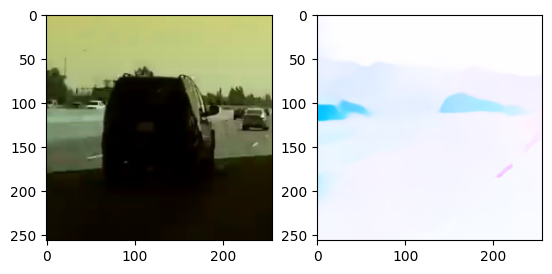

In [51]:
check(mp_label.numpy())

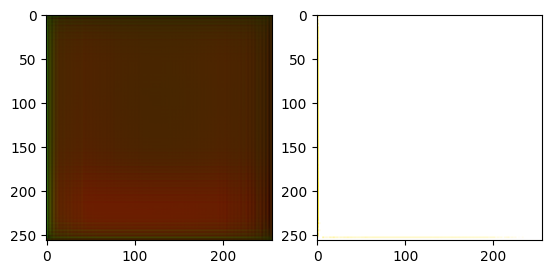

In [52]:
check(mp_out.numpy())

In [53]:
import matplotlib.pyplot as plt
import flow_vis

def check(array):
    a = []
    b = []
    for i in range(5):
        a.append(array[i,:,:,:3])
        b.append(flow_vis.flow_to_color(array[i,:,:,3:]))
        #flow_color = flow_vis.flow_to_color(concated[0,:,:,3:])

    for i in range(5):
        plt.subplot(2,5,i+1)
        plt.imshow(a[i])
        plt.title(i+1)
        plt.subplot(2,5,5+i+1)
        plt.imshow(b[i])
        plt.title(i+1)

In [74]:
import matplotlib.pyplot as plt
import flow_vis

def check(array):
    a = array[2,:,:,:3]
    b = array[2,:,:,3:]
    #b = []
    #for i in range(5):
    #    a.append(array[i,:,:,:3])
    #    b.append(flow_vis.flow_to_color(array[i,:,:,3:]))
    #    #flow_color = flow_vis.flow_to_color(concated[0,:,:,3:])
    
    flow_color = flow_vis.flow_to_color(b)

    plt.subplot(1,2,1)
    plt.imshow(a)

    plt.subplot(1,2,2)
    plt.imshow(flow_color)


    #for i in range(5):
    #    plt.subplot(2,5,i+1)
    #    plt.imshow(a[i])
    #    plt.title(i+1)
    #    plt.subplot(2,5,5+i+1)
    #    plt.imshow(b[i])
    #    plt.title(i+1)

In [75]:
def check_input(array):
    a = array[2,2,:,:,:3]
    b = array[2,2,:,:,3:]
    #b = []
    #for i in range(5):
    #    a.append(array[i,:,:,:3])
    #    b.append(flow_vis.flow_to_color(array[i,:,:,3:]))
    #    #flow_color = flow_vis.flow_to_color(concated[0,:,:,3:])
    
    flow_color = flow_vis.flow_to_color(b)

    plt.subplot(1,2,1)
    plt.imshow(a)

    plt.subplot(1,2,2)
    plt.imshow(flow_color)

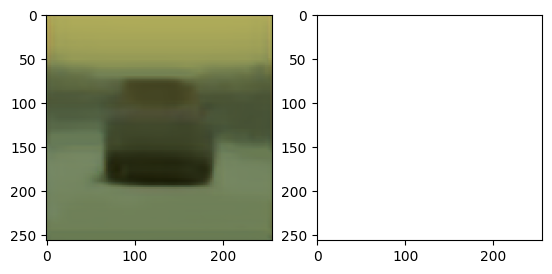

In [76]:
check(mp_out.numpy())

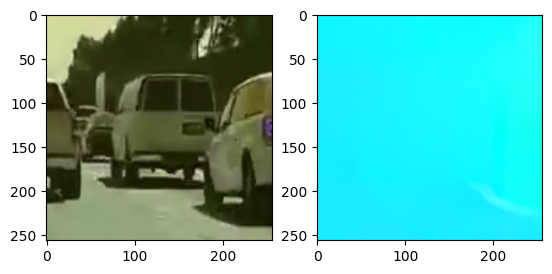

In [77]:
check_input(aot_input.numpy())

In [48]:
logs

{}

In [ ]:
optical = mp_